## 線形系回帰予測を行なう 10本 Knock

### Knock41: Data を加工しよう

In [2]:
# Data の読み込み
from sklearn.datasets import load_boston

boston = load_boston()

import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

from IPython.display import display

display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# 説明変数・目的変数の分割

X = df[boston.feature_names[:13]]
y = df[['MEDV']]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [4]:
# 訓練 Data・Test data の分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


### Knock42: Data を Scaling しよう
#### Data の Scaling
複数の説明変数間での Data の尺度を揃えること。重回帰のような複数の説明変数を扱う線形系の Algorithm は、Data の尺度による影響が大きいため、正しく学習させるためには Data の Scaling が必要になる

##### Scaling の主な手法２つ
| 名称  | 概要                                    | 有効な Data 分布 |
|-----|---------------------------------------|-------------|
| 標準化 | 説明変数の平均が 0, 標準偏差が 1 になるように Scaling する | 正規分布        |
| 正規化 | 説明変数の値が 0 ~ 1 の範囲に収まるように Scaling する   | 一様分布        |
- 正規分布でも一様分布でもない場合などは、Robust Z-score という手法が用いられることもある。
- Scaling に正解はなく Model 精度と組み合わせていく。

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print(X_train_scaled[:3])
print(X_test_scaled[:3])

[[-0.20735619 -0.49997924  1.54801583 -0.26360274  0.58821309 -1.83936729
   1.10740225 -1.1251102  -0.61816013  0.20673466  1.2272573   0.42454294
   3.10807269]
 [-0.38886492  0.34677427 -0.58974728 -0.26360274 -0.79782145  0.32748658
  -0.36766106  0.07509    -0.73363701 -1.04949303  0.05696346  0.40185312
  -0.66643035]
 [-0.33573486 -0.49997924  1.54801583 -0.26360274  0.58821309  0.03790703
   1.04311378 -0.79998434 -0.61816013  0.20673466  1.2272573   0.39846135
   0.63936662]]
[[-0.45379523 -0.45888196 -1.2285158  -0.29277002 -0.7850976   0.14806054
  -1.7758721   0.61364717 -0.68477673  0.04137254 -0.74998219  0.26955997
  -0.79993845]
 [ 0.55063352 -0.45888196  1.04438686 -0.29277002  0.68330592 -0.0188666
   1.14170823 -1.23391041  1.59531227  1.49212109  0.88492032  0.18133643
  -0.49829647]
 [-0.44864325 -0.45888196  0.40044876  3.41565026 -0.01225364  0.20512964
   0.873911   -0.23183135 -0.57077228 -0.90530236 -0.99769469  0.4499995
  -0.36469248]]


### Knock43: 重回帰 Model を構築しよう
#### 重回帰
複数の説明変数を用いて１つの目的変数を予測する Algorithm

In [6]:
# 重会議 Model の構築
from sklearn.linear_model import LinearRegression

multi_reg = LinearRegression().fit(X_train_scaled, y_train)

In [7]:
# 予測値の算出
y_train_pred = multi_reg.predict(X_train_scaled)
y_test_pred = multi_reg.predict(X_test_scaled)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

354
[[ 4.58009023]
 [28.38354012]
 [17.27775551]
 [29.39070404]
 [20.54476971]]
152
[[26.00247623]
 [24.12967879]
 [30.19850019]
 [12.66547763]
 [22.31194771]]


### Knock44: 重回帰 Model を評価しよう

In [8]:
import matplotlib.pyplot as plt

# plt.scatter(X_train, y_train_pred, label='train')
# plt.scatter(X_test, y_test_pred, label='test')
# plt.xlabel('X')
# plt.ylabel('y')
# plt.title('multi_reg')
# plt.legend()
# plt.show()

可視化できるのは３次元までなので、それ以上の高次元 Data の可視化はできない。

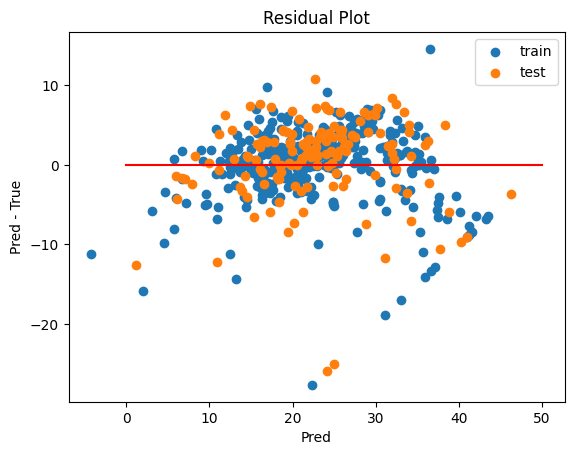

In [9]:
# 残差 Plot
def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
    plt.scatter(y_train_pred, y_train_pred - y_train, label='train')
    plt.scatter(y_test_pred, y_test_pred - y_test, label='test')
    plt.plot([0, 50], [0, 0], color='red')
    plt.xlabel('Pred')
    plt.ylabel('Pred - True')
    plt.title('Residual Plot')
    plt.legend()
    plt.show()


residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [10]:
# Score 算出（重回帰 Model）
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def get_eval_score(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2score = r2_score(y_true, y_pred)

    print(f"    MAE = {mae}")
    print(f"    MSE = {mse}")
    print(f"    RMSE = {rmse}")
    print(f"    R2 = {r2score}")


print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE = 3.103606103908004
    MSE = 19.958219814238046
    RMSE = 4.4674623461466405
    R2 = 0.7645451026942549
Test Data Score
    MAE = 3.8653885902456655
    MSE = 28.38191043904823
    RMSE = 5.327467544626455
    R2 = 0.6591396211105127


### Knock45: 各説明変数の重みを確認しよう
y = w1x1 + w2x2 + w3+x3 + ･･･ + wnxn + b
の各 w と b の値を求める。w の値が他と比べて大きいほど、Model への貢献度が高い変数と言える。

In [11]:
# 重みの算出（重回帰 Model）
for i, (col, coef) in enumerate(zip(boston.feature_names, multi_reg.coef_[0])):
    print(f"w{i}({col}): {coef}")
print(f"b: {multi_reg.intercept_[0]}")

w0(CRIM): -1.0119005895981459
w1(ZN): 1.050280274303273
w2(INDUS): 0.07920966467269608
w3(CHAS): 0.6189619959077604
w4(NOX): -1.873691017163078
w5(RM): 2.7052697851113177
w6(AGE): -0.27957263891830064
w7(DIS): -3.0976648638690603
w8(RAD): 2.0968999836727567
w9(TAX): -1.8860633909786886
w10(PTRATIO): -2.2611046607987664
w11(B): 0.5826430949043792
w12(LSTAT): -3.4404983779426255
b: 22.7454802259887


過学習が起こりやすい要員の一つに**「説明変数の重みが大きいこと」**がある。
過学習の Risk を減らすためには、説明変数の重みを小さくする処置が重要となる。

### Knock46: LASSO回帰Model を構築しよう
#### LASSO回帰
- 重みが大きくなるのを抑えるために、重回帰による各変数の重み算出時に **正則化項** という Penalty を設けている
- この正則化項は **L1-Norm** と言い、変数の重みを 0 に近づけると同時に、特定の変数の重みを 0 にする効果がある。
- 過学習を抑えるだけではなく、一部の変数の重みが 0 になることで Model が Simple になり、解釈が容易になる、という Merit がある。

In [12]:
# LASSO回帰Model の構築
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train_scaled, y_train)

In [13]:
# 予測値に出力
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5])

[ 5.03643518 25.9286159  18.46752392 29.47865897 18.4365082 ]
[27.21459859 22.6149087  26.441333   14.44652064 22.9168076 ]


In [14]:
# Data 形式の変更
y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

print(y_train_pred[:5])
print(y_test_pred[:5])

[[ 5.03643518]
 [25.9286159 ]
 [18.46752392]
 [29.47865897]
 [18.4365082 ]]
[[27.21459859]
 [22.6149087 ]
 [26.441333  ]
 [14.44652064]
 [22.9168076 ]]


### Knock47: LASSO回帰Model を評価しよう

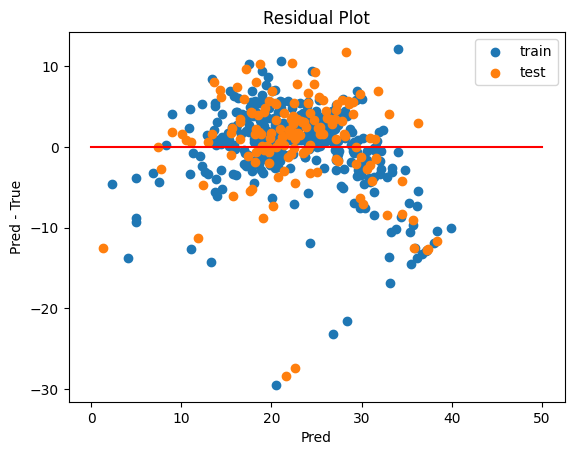

In [15]:
# 残差 Plot （LASSO回帰Model）
residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [16]:
# Score算出（LASSO回帰Model）
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE = 3.5699072408087855
    MSE = 26.04321595909546
    RMSE = 5.103255427577133
    R2 = 0.6927580317165543
Test Data Score
    MAE = 4.149505755346782
    MSE = 34.103111934714995
    RMSE = 5.839786976826723
    R2 = 0.59042927429633


In [17]:
# 重み出力（LASSO回帰Model）
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso.coef_)):
    print(f"w{i}({col}): {coef}")

print(f"b: {lasso.intercept_[0]}")

w0(CRIM): -0.034090271533184835
w1(ZN): 0.0
w2(INDUS): -0.0
w3(CHAS): 0.0
w4(NOX): -0.0
w5(RM): 2.675474907498284
w6(AGE): -0.0
w7(DIS): -0.0
w8(RAD): -0.0
w9(TAX): -0.11974266293161767
w10(PTRATIO): -1.7848358849469919
w11(B): 0.002439893578826776
w12(LSTAT): -3.4042835866347283
b: 22.7454802259887


### Knock48: LASSO回帰の Hyper Parameter を変更しよう
#### Hyper Parameter
機械学習Model が持つ Parameter の中でも、人間が任意に調整できる Parameter のこと。
Hyper Parameter の設定次第で Model の精度が大きく変わることがあるので適切な値を指定できることが望ましい

##### LASSO回帰 の Hyper Parameter
`alpha=` : 正則化項による Penalty の強さを調整する。値が大きいほど重みを 0 にしようとする力が強くなる。

In [18]:
# alpha 変更 Model（LASSO）
lasso_change_param = Lasso(alpha=10).fit(X_train_scaled, y_train)

In [19]:
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso_change_param.coef_)):
    print(f"w{i}({col}): {coef}")

print(f"b: {lasso_change_param.intercept_}")

w0(CRIM): -0.0
w1(ZN): 0.0
w2(INDUS): -0.0
w3(CHAS): 0.0
w4(NOX): -0.0
w5(RM): 0.0
w6(AGE): -0.0
w7(DIS): 0.0
w8(RAD): -0.0
w9(TAX): -0.0
w10(PTRATIO): -0.0
w11(B): 0.0
w12(LSTAT): -0.0
b: [22.74548023]


最適な alpha を見つけるためには検証が必要。

### Knock49: 交差検証で最適な Parameter を見つけよう
- 最適な `alpha`値を見つけるためには複数の `alpha`値での結果を比較する必要がある。
- 同時に複数の `alpha`値で検証を行なう場合は、`LassoCV` Class が便利。複数の `alpha` で交差検証を行ない、最も精度が高かった時の `alpha` を正規の結果とすることができる。

In [23]:
# LassoCV の利用
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.1, 0.5, 1, 5, 10]).fit(X_train_scaled, y_train)

/home/tera/.local/share/virtualenvs/ai_model_building_100-X6USFNE2/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
# 重み出力（LassoCV）
print(f"alpha = {lasso_cv.alpha_}")
for i, (col, coef) in enumerate(zip(boston.feature_names, lasso_cv.coef_)):
    print(f"w{i}({col}) = {coef}")
print(f"b = {lasso_cv.intercept_}")

alpha = 0.1
w0(CRIM) = -0.7133034000316576
w1(ZN) = 0.7015825573132028
w2(INDUS) = -0.06950534556200727
w3(CHAS) = 0.6039977960951486
w4(NOX) = -1.4442274438641611
w5(RM) = 2.8342862608317847
w6(AGE) = -0.08964619928269538
w7(DIS) = -2.3459318438739833
w8(RAD) = 0.6393481046889826
w9(TAX) = -0.6573788858076535
w10(PTRATIO) = -2.163676229598883
w11(B) = 0.47238047527334126
w12(LSTAT) = -3.5044268386860917
b = 22.7454802259887


In [25]:
# 予測値の算出（LassoCV）
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

In [26]:
# Score 算出（LassoCV）
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE = 3.114624214010965
    MSE = 20.417290181302135
    RMSE = 4.51854956609996
    R2 = 0.759129270664182
Test Data Score
    MAE = 3.876685148034004
    MSE = 29.480085367142166
    RMSE = 5.429556645541344
    R2 = 0.6459507865223366


交差検証もうまく活用して効率的に Parameter の調整をしていく。

### Knock50: Ridge回帰で Model を構築・評価しよう
#### Ridge回帰
- **L2-Norm** という正則化項を使用した Algorithm.
- 各変数の重みを 0 に近づけるが、完全な 0 とはならない
- Model の設計上、全ての説明変数が重要である、という Case えは Ridge回帰の方が適している

In [28]:
# Model 構築（Ridge回帰Model）
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)

In [29]:
# 予測値の算出
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

print(y_train_pred[:5])
print(y_test_pred[:5])

[[ 4.62395491]
 [28.33619682]
 [17.31360342]
 [29.40211899]
 [20.44193208]]
[[26.08912497]
 [24.06595743]
 [30.15670256]
 [12.65900708]
 [22.32902563]]


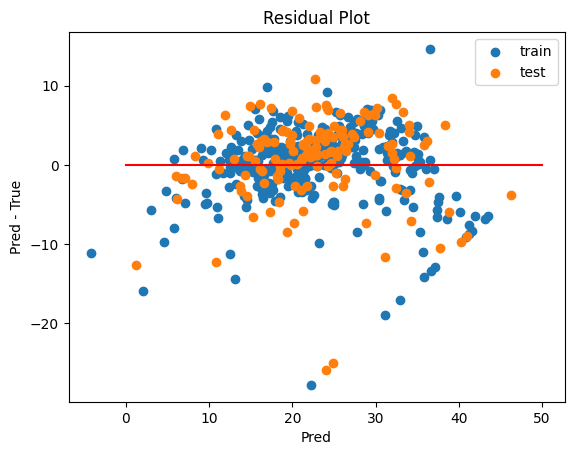

In [30]:
# 残差 Plot
residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [31]:
# Score 算出
print('訓練 Data Score')
get_eval_score(y_train, y_train_pred)
print('Test Data Score')
get_eval_score(y_test, y_test_pred)

訓練 Data Score
    MAE = 3.1000682747403814
    MSE = 19.959850066669595
    RMSE = 4.467644800862038
    R2 = 0.7645258699709747
Test Data Score
    MAE = 3.8636624546077663
    MSE = 28.43467198392619
    RMSE = 5.33241708645584
    R2 = 0.6585059667898665


In [32]:
# 重み出力（Ridge回帰 Model）
for i, (col, coef) in enumerate(zip(boston.feature_names, ridge.coef_[0])):
    print(f"w{i}({col}) = {coef}")
print(f"b = {ridge.intercept_[0]}")

w0(CRIM) = -1.002006632284245
w1(ZN) = 1.031478992058365
w2(INDUS) = 0.049805093928141496
w3(CHAS) = 0.6237499859394253
w4(NOX) = -1.8352627540651745
w5(RM) = 2.715728009463042
w6(AGE) = -0.28544778146901334
w7(DIS) = -3.058899648976711
w8(RAD) = 2.0115911281842136
w9(TAX) = -1.8065108419760212
w10(PTRATIO) = -2.251976581476515
w11(B) = 0.5829303480062233
w12(LSTAT) = -3.4245574982351448
b = 22.7454802259887
